# <center>L2 Computational Physics</center>
---
## Week 4: Differential Equations II

In this notebook, you will write a program to study the trajectory of a spherical, iron cannonball in the presence of gravity and drag forces. 

In [68]:
import numpy
from matplotlib import pyplot as plt

In [69]:
# Define all constants to be used in the simulation
r_cb = 0.15  # Radius of cannonball in m
rho_iron = 7874  # Density of iron in kg/m^3
g = 9.81  # Acceleration due to gravity in m/s^2
kappa = 0.47  # Drag coefficient of a sphere
rho_air = 1.23  # Density of air in kg/m^3
v0 = 125.00  # Initial speed in m/s

From this information, calculate the following two variables:

In [70]:
def get_area(r):
    return numpy.pi * r ** 2
    
    
    ''' 
    This function returns the cross section area of a sphere of radius r. The returned 
    value is in the squared units of the unit of the radius argument.
    '''
    # YOUR CODE HERE

def get_mass(r):
    return rho_iron * 4/3 * numpy.pi * r ** 3
    ''' 
    This function returns the mass of an iron sphere of radius r. The radius 
    should be given in meter and the return value is in kg.
    '''
    # YOUR CODE HERE

area_cb = get_area(r_cb)
mass_cb = get_mass(r_cb)

In [71]:
# these tests are worth one mark
assert numpy.isclose(area_cb, 0.07068583470577035)
assert numpy.isclose(mass_cb, 111.31605249464711)

## The Differential Equations

Create a function `f` which calculates the right-hand side of the differential equation

$$ \frac{d}{dt}\left(\begin{array}{c}x\\y\\v_x \\v_y \end{array}\right) = f(x, y, v_x, v_y, t)$$

such that the differential equation represents the cannonball's motion as it moves through the air. 

- *Your function should accept two arguments:*
    - `r` *- a numpy array representing the cannonball's state, $(x, y, v_{x}, v_{y})$.*
    - `t` *- Time * 
    
- *The drag force experienced by the cannonball is given by $$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}~,$$ where $\widehat{v}$ is a unit vector pointing in the direction of the cannonball's instantaneous velocity.*

In [72]:
def f(r, t):
    '''Implements differential equation for cannonball from state vector r and time t'''
    
    # Unpack array of the state
    x, y, vx, vy = r
    
    # these variables should updated in your code to be the derivatives of 
    # the x, y positions and the derivative of the x, y velocities. 
    dx_dt, dy_dt, dvx_dt, dvy_dt = 0, 0, 0, 0
    dx_dt = vx
    dy_dt = vy
    vhat = numpy.array([vx, vy])
    #magnitude cancels in Fd eq so will not include it
    F_dx = - 1/2 * kappa * rho_air * (vx**2 + vy**2)**(1/2) * area_cb * vx
    F_dy = - 1/2 * kappa * rho_air * (vx**2 + vy**2)**(1/2) * area_cb * vy   
    dvx_dt = F_dx/mass_cb
    dvy_dt = (F_dy/mass_cb) - g
    
    # YOUR CODE HERE
    return numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt])


print (f((0, 0, 88.38834764831843, 88.38834764831843), 0))

[ 88.38834765  88.38834765  -2.0279283  -11.8379283 ]


Check your result:

In [73]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert len(f(r_test, 0))== 4

In [74]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(f(r_test, 0), [ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ]).all()

## Solving the Differential Equations

Create the function `solve_euler(state_initial, t1, n_panels)` which solves the differential equations using Euler's method.

- `state_initial` *is a numpy array containing the initial conditions $(x_{0}, y_{0}, v_{x0}, v_{y0})$*
- *When working with a numpy array, you can use the same commands as those used for single variables - for instance,* `state += f(state, t)`.
- *This function should record all state values at each timepoint in the variable `history` and return it. This will be similar to last week, only this time you will have to populate a 2D array.* 


In [75]:
def solve_euler(state_initial, t1, n_steps):
    '''Solves ODE using Euler's method from state_initial to end time t1 using n_panels panels'''
    # Define array for trajectory history
    history = numpy.empty((n_steps+1,4))  # Number of columns is equal to number of variables to solve for (4)
    history[0] = state_initial
    dt = t1/n_steps
    
    
    for i in range(1, n_steps+1):
        x0 = history[i-1,0]
        y0 = history[i-1,1]
        a = f(history[i-1], dt*i)
        x = x0 + a[0]*dt
        y = y0 + a[1]*dt
        vx = a[0] + a[2]*dt
        vy = a[1] + a[3]*dt
        history[i] = [x, y, vx, vy]
    
    
    return history

solve_euler(r_test, 25.0, 10)

array([[   0.        ,    0.        ,   88.38834765,   88.38834765],
       [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
       [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
       [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
       [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
       [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
       [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
       [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
       [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
       [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
       [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])

Test your solution:

In [76]:
# this test is worth 4 marks
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(solve_euler(r_test, 25.0, 10), numpy.array(
    [[   0.        ,    0.        ,   88.38834765,   88.38834765],
     [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
     [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
     [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
     [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
     [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
     [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
     [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
     [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
     [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
     [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])).all()

## Finding the range

To find the range of the projectile we will look for the $x$ coordinate when the trajectory crosses the $y=0$ line. In most cases that point will not be one of the steps but will be between two steps. We will use a linear approximation to determine this point given the last point with a positive $y$ value and the first point with a negative $y$ value. Implement the function `find_zero_linear` that takes as argument the two values of $x$ `x1` and `x2` and the heights `y1` and `y2` and returns the value of $x$ at which the line between $(x_1,y_1)$ and $x_2,y_2$ crosses the $y=0$ line.  

In [77]:
def find_zero_linear(x1, x2, y1, y2):
    if y1*y2 > 0:
        print("I expect y1 and y2 to have opposite signs!")
    # YOUR CODE HERE
    else:
        m = (y2-y1)/(x2-x1)
        c = y1 - m*x1
        x = -c/m
    return x

In [78]:
# these tests are worth 2 marks
assert numpy.isclose(find_zero_linear(-1,1,3,-3),0.0)
assert numpy.isclose(find_zero_linear(-1,1,1,-3), -0.5)

Given the function above we can define a function to determine the range. (Don't modify it!)

In [79]:
def find_range(history):
    all_xs = history[:,0]
    all_ys = history[:,1]
    negatives = numpy.argwhere(all_ys<0)
    if len(negatives) == 0 :
        print ("The projectile did not touch down! Returning the last known location")
        return all_xs[-1]
    (index,) = negatives[0]
    y1, y2 = all_ys[index-1], all_ys[index]
    x1, x2 = all_xs[index -1], all_xs[index]
    return find_zero_linear(x1,x2,y1,y2)

In [80]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
h = solve_euler(r_test, 25.0, 10000)
assert numpy.isclose(find_range(h),1306.2541)

## Plotting task

Create a plot to show the trajectories for different values of the initial angle. Use the same velocity $v0=125\rm{m/s}$ for all angles. The plot should have axis labels and a title. [4 marks]


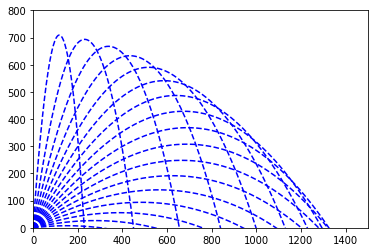

In [81]:
n_steps = 1000
thetas = range(5, 90, 5) # the angles in degrees



def initial(theta):
    return [0, 0, 125*numpy.cos((2*numpy.pi/360)*theta), 125*numpy.sin((2*numpy.pi/360)*theta)]

values_euler1 = solve_euler(initial(5), 300, n_steps)
values_euler2 = solve_euler(initial(10), 300, n_steps)
values_euler3 = solve_euler(initial(15), 300, n_steps)
values_euler4 = solve_euler(initial(20), 300, n_steps)
values_euler5 = solve_euler(initial(25), 300, n_steps)
values_euler6 = solve_euler(initial(30), 300, n_steps)
values_euler7 = solve_euler(initial(35), 300, n_steps)
values_euler8 = solve_euler(initial(40), 300, n_steps)
values_euler9 = solve_euler(initial(45), 300, n_steps)
values_euler10 = solve_euler(initial(50), 300, n_steps)
values_euler11 = solve_euler(initial(55), 300, n_steps)
values_euler12 = solve_euler(initial(60), 300, n_steps)
values_euler13 = solve_euler(initial(65), 300, n_steps)
values_euler14 = solve_euler(initial(70), 300, n_steps)
values_euler15 = solve_euler(initial(75), 300, n_steps)
values_euler16 = solve_euler(initial(80), 300, n_steps)
values_euler17 = solve_euler(initial(85), 300, n_steps)

xs_euler1, ys_euler1 = values_euler1[:,0], values_euler1[:,1]
xs_euler2, ys_euler2 = values_euler2[:,0], values_euler2[:,1]
xs_euler3, ys_euler3 = values_euler3[:,0], values_euler3[:,1]
xs_euler4, ys_euler4 = values_euler4[:,0], values_euler4[:,1]
xs_euler5, ys_euler5 = values_euler5[:,0], values_euler5[:,1]
xs_euler6, ys_euler6 = values_euler6[:,0], values_euler6[:,1]
xs_euler7, ys_euler7 = values_euler7[:,0], values_euler7[:,1]
xs_euler8, ys_euler8 = values_euler8[:,0], values_euler8[:,1]
xs_euler9, ys_euler9 = values_euler9[:,0], values_euler9[:,1]
xs_euler10, ys_euler10 = values_euler10[:,0], values_euler10[:,1]
xs_euler11, ys_euler11 = values_euler11[:,0], values_euler11[:,1]
xs_euler12, ys_euler12 = values_euler12[:,0], values_euler12[:,1]
xs_euler13, ys_euler13 = values_euler13[:,0], values_euler13[:,1]
xs_euler14, ys_euler14 = values_euler14[:,0], values_euler14[:,1]
xs_euler15, ys_euler15 = values_euler15[:,0], values_euler15[:,1]
xs_euler16, ys_euler16 = values_euler16[:,0], values_euler16[:,1]
xs_euler17, ys_euler17 = values_euler17[:,0], values_euler17[:,1]


plt.plot(xs_euler1, ys_euler1, color='blue', linestyle='--')
plt.plot(xs_euler2, ys_euler2, color='blue', linestyle='--')
plt.plot(xs_euler3, ys_euler3, color='blue', linestyle='--')
plt.plot(xs_euler4, ys_euler4, color='blue', linestyle='--')
plt.plot(xs_euler5, ys_euler5, color='blue', linestyle='--')
plt.plot(xs_euler6, ys_euler6, color='blue', linestyle='--')
plt.plot(xs_euler7, ys_euler7, color='blue', linestyle='--')
plt.plot(xs_euler8, ys_euler8, color='blue', linestyle='--')
plt.plot(xs_euler9, ys_euler9, color='blue', linestyle='--')
plt.plot(xs_euler10, ys_euler10, color='blue', linestyle='--')
plt.plot(xs_euler11, ys_euler11, color='blue', linestyle='--')
plt.plot(xs_euler12, ys_euler12, color='blue', linestyle='--')
plt.plot(xs_euler13, ys_euler13, color='blue', linestyle='--')
plt.plot(xs_euler14, ys_euler14, color='blue', linestyle='--')
plt.plot(xs_euler15, ys_euler15, color='blue', linestyle='--')
plt.plot(xs_euler16, ys_euler16, color='blue', linestyle='--')
plt.plot(xs_euler17, ys_euler17, color='blue', linestyle='--')

#values_euler = solve_euler(initial(45), 300, n_steps)










plt.xlim(0,1500)
plt.ylim(0,800);

Create a plot to show the range for different values of the initial velocity. Use the same angle $\theta=60^\circ$ for all velocities. The plot should have axis labels and a title and legend. Produce one curve with and one curve without the effect of air resistance. [5 marks]


[ 0.          0.         25.         43.30127019]
[ 219.42500049  777.46461654 1502.02451173 2253.75601213 2960.39013505
 3596.83720005 4160.95242219 4659.4238688  5101.16676152 5494.81961708
 5847.90744597 6166.77407339 6456.5645243  6721.50719922 6965.11554248
 7190.2086448  7399.17291049 7593.97067184 7776.24352358 7947.39597226]
[  220.69964419   882.79857674  1986.29679767  3531.19430697
  5517.49110464  7945.18719068 10814.2825651  14124.77722788
 17876.67117904 22069.96441856 26704.65694646 31780.74876273
 37298.23986737 43257.13026038 49657.41994177 56499.10891152
 63782.19716965 71506.68471615 79672.57155101 88279.85767425]


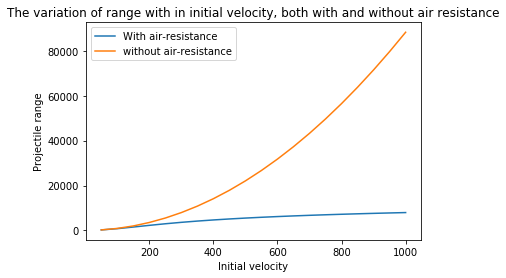

In [106]:
#without air resistance is just solving suvat

n_steps = 1000
max_time = 300
v0s = numpy.linspace(50, 1000, 20)


ranges = []
ranges_noresistance = []
theta0 = numpy.deg2rad(60)

# air resistance first

def velocity(v):
    vx0 = v*numpy.cos(theta0)
    vy0 = v*numpy.sin(theta0)
    return vx0, vy0

x = velocity(v0s)[0]
y = velocity(v0s)[1]


for i in range (0,20):
    a = numpy.empty((20,4))
    a[i] = [0, 0, x[i], y[i]]
    
print(a[0])
yvalues1 = numpy.zeros(20)
for i in range (0, 20):
    
    firsttry = solve_euler(a[i], 300, 1000)
    yvalues1[i] = find_range(firsttry)
print (yvalues1)

xvalues = v0s

#now for for no air resistance
yvalues2 = numpy.zeros(20)
for i in range (0,20):
    yvalues2[i] = (2/g)*(x[i]*y[i])
print (yvalues2)



plt.plot(xvalues, yvalues1, label = 'With air-resistance')
plt.plot(xvalues, yvalues2, label = 'without air-resistance')
plt.title('The variation of range with in initial velocity, both with and without air resistance')
plt.xlabel('Initial velocity')
plt.ylabel('Projectile range')
plt.legend()





#for i in range (0,20):
    #d = solve_euler(a[i], 300, n_steps)
    #find_range(d)
    
#print (d)    

    

    
    
    
    
    
    
    
    